<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Обработка-и-исследовательский-анализ-данных" data-toc-modified-id="Обработка-и-исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обработка и исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-и-объявление-констант" data-toc-modified-id="Импорт-и-объявление-констант-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт и объявление констант</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-тестирование-модели" data-toc-modified-id="Обучение-и-тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Создание-загрузчиков-данных" data-toc-modified-id="Создание-загрузчиков-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание загрузчиков данных</a></span></li><li><span><a href="#Создание-модели" data-toc-modified-id="Создание-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание модели</a></span></li><li><span><a href="#Вывод-результатов-обучения-и-тестирования" data-toc-modified-id="Вывод-результатов-обучения-и-тестирования-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод результатов обучения и тестирования</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение возраста покупателей

## Введение

**Описание задачи:**  
Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы, контролировать добросовестность кассиров при продаже алкоголя.  

**Цели исследования:**  
Необходимо построить модель, которая по фотографии определит приблизительный возраст человека.  
- Целевой признак - возраст покупателя `real_age`.
- Метрикой выступает `MAE`, её значение не должно быть больше 8.

**Ход исследования:**
1. Подготовка и исследовательский анализ данных.
2. Обучение и тестирование модели.
3. Анализ обученной модели и общий вывод.

## Обработка и исследовательский анализ данных

### Импорт и объявление констант

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from skimpy import skim
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

sns.set(style="darkgrid")

Задаю константы и вывожу информацию о датасете. Типы данных указаны верно, в датасете нет пропусков.  Убираю лишний признак.

In [2]:
SEED = 23461
data = pd.read_csv('labels.csv')
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7591   │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25     ┃ p75     ┃ p100    ┃ hist       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Unnamed: 0         │     0 │       0 │    3800 │    2200 │    0 │    1900 │    5700 │    7600 │   ██████   │  │
│ │ real_age           │     0 │       0 │      31 │      17 │    1 │      20 │      41 │     100 │   ▄█▅▂▁    │  │
│ └────────────────────┴───────┴─────────┴─────────┴─────────┴──────┴─────────┴─────────┴─────────┴────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ file_name                 │       0 │          0 │                            1 │                     7600 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [3]:
data = data[['real_age', 'file_name']]

### Исследовательский анализ данных

Проверяю корректность заполнения столбца `file_name`. Все названия файлов заканчиваются на `.jpg` (если бы были еще другие можно было бы использовать regex для проверки) и все названия уникальны.

In [4]:
data['file_name'].str.endswith('.jpg').sum()

7591

In [5]:
data['file_name'].nunique()

7591

В датасете значения соответствуют действительности - все значения положительные, максимум достигается в значении 100. Если не считать всплеск в интервале 1-7 (это логично, родители часто ходят в магазин с маленькими детьми), выборка напоминает нормальное распределение, смещена вправо.

In [6]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


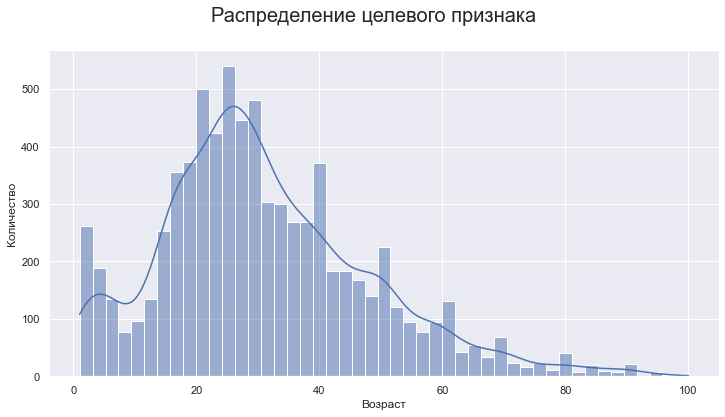

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=data, x='real_age', ax=ax, kde=True)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')
fig.suptitle('Распределение целевого признака', fontsize=20)
plt.show()

Объявляю новые константы и аргументы для функций. Соотношение тренеровочной и тестовой выборки 3:1.

In [8]:
W, H = (224, 224)
datagen_args = dict(
    validation_split=0.25,
    rescale=1./255
)
data_flow_args = dict(
    dataframe=data,
    directory='files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(W, H),
    batch_size=32,
    class_mode='raw',
    seed=SEED
)

Вывожу несколько изображений на экран для проверки.

In [9]:
datagen = ImageDataGenerator(**datagen_args)
data_flow = datagen.flow_from_dataframe(**data_flow_args) 
features, target = next(data_flow)

Found 7591 validated image filenames.


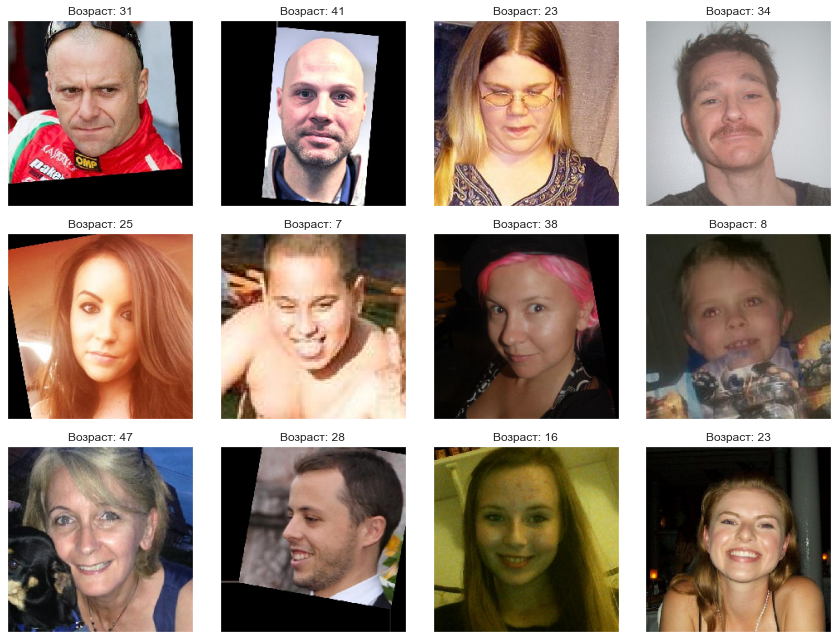

In [10]:
fig = plt.figure(figsize=(12,12))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    ax = plt.imshow(features[i])
    plt.title('Возраст: ' + str(target[i]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Вывод

На этом этапе исследования был загружен датасет, значения проверены на адекватность. Также изучено распределение целевого признака, выведено несколько изображений для проверки.

## Обучение и тестирование модели

### Создание загрузчиков данных

Разобью датасет на тренеровочный и тестовый. Для тренеровочного датасета добавлю поворот изображений по горизонтали, это может повысить качество обучения.

In [11]:
data_flow_args['subset'] = 'validation'

datagen = ImageDataGenerator(**datagen_args)
data_flow_test = datagen.flow_from_dataframe(**data_flow_args) 

Found 1897 validated image filenames.


In [12]:
data_flow_args['subset'] = 'training'
datagen_args['horizontal_flip'] = True

datagen = ImageDataGenerator(**datagen_args)
data_flow_train = datagen.flow_from_dataframe(**data_flow_args) 

Found 5694 validated image filenames.


### Создание модели

Создаю свёрточную нейронную сеть ResNet50, предварительно обученную на `imagenet` без последних слоев. Задача регрессии, значит в конце один нейрон с активацией `relu`, чтобы отрицательные значения были равны 0. Функцией потерь выступает `MSE`, метрикой `MAE`.

In [13]:
WEIGHTS = 'imagenet'

backbone = ResNet50(input_shape=(W, H, 3),
                    weights=WEIGHTS,
                    include_top=False)

model = Sequential()
model.add(backbone)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='relu'))

optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error',
              metrics=['mean_absolute_error'])

C:\Users\khrom\anaconda3\envs\practicum\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Вывод результатов обучения и тестирования

Модель была обучена на GPU за 7-8 минут, значение метрики `MAE` на тестовой выборке равно 5.96 - значение ниже установленного максимума в 8. Ниже показан вывод результатов обучения на экран и метод `fit`, которую вызвал для обучения модели.

```python
model.fit(data_flow_train, validation_data=data_flow_test, epochs=11, verbose=2)
```

Train for 178 steps, validate for 60 steps

Epoch 1/11

178/178 - 49s - loss: 244.2291 - mean_absolute_error: 11.0572 - val_loss: 1057.8633 - val_mean_absolute_error: 27.8093

Epoch 2/11

178/178 - 41s - loss: 76.7975 - mean_absolute_error: 6.6225 - val_loss: 789.9771 - val_mean_absolute_error: 22.9210

Epoch 3/11

178/178 - 41s - loss: 50.6679 - mean_absolute_error: 5.4635 - val_loss: 270.7070 - val_mean_absolute_error: 12.0251

Epoch 4/11

178/178 - 40s - loss: 39.8116 - mean_absolute_error: 4.7929 - val_loss: 127.5339 - val_mean_absolute_error: 8.7215

Epoch 5/11

178/178 - 41s - loss: 28.3420 - mean_absolute_error: 4.0764 - val_loss: 89.7988 - val_mean_absolute_error: 7.1948

Epoch 6/11

178/178 - 40s - loss: 21.9910 - mean_absolute_error: 3.5815 - val_loss: 71.2865 - val_mean_absolute_error: 6.1921

Epoch 7/11

178/178 - 40s - loss: 17.3559 - mean_absolute_error: 3.1904 - val_loss: 73.5638 - val_mean_absolute_error: 6.4289

Epoch 8/11

178/178 - 40s - loss: 13.8746 - mean_absolute_error: 2.8398 - val_loss: 73.6621 - val_mean_absolute_error: 6.2728

Epoch 9/11

178/178 - 42s - loss: 11.3716 - mean_absolute_error: 2.5665 - val_loss: 67.9722 - val_mean_absolute_error: 6.0366

Epoch 10/11

178/178 - 40s - loss: 9.7169 - mean_absolute_error: 2.3736 - val_loss: 68.4000 - val_mean_absolute_error: 6.0862

Epoch 11/11

178/178 - 40s - loss: 9.1299 - mean_absolute_error: 2.2675 - val_loss: 68.7470 - val_mean_absolute_error: 5.9646


60/60 - 10s - loss: 68.7470 - mean_absolute_error: 5.9646

Test MAE: 5.9646


## Общий вывод

Целью исследования выступало построение модели, которая по фотографии определит приблизительный возраст человека. Условия:
- Целевой признак - возраст покупателя `real_age`.
- Метрикой выступает `MAE`, её значение не должно быть больше 8.

Датасет был загружен, значения проверены на адекватность. Также изучено распределение целевого признака, выведено несколько изображений для проверки.  

Свёрточная нейронная сеть была обучена на GPU, использовалась `ResNet50`, предварительно обучена на `imagenet`, в конце один нейрон с активацией `relu`, чтобы отрицательные значения были равны 0. Функцией потерь выступает `MSE`, метрикой `MAE`. В тестовой выборке 25% от всех наблюдений. 

Модель обучилась за 7-8 минут, значение метрики `MAE` на тестовой выборке равно 5.96 - значение ниже установленного максимума в 8. Модель с такой ошибкой сможет верно предсказать возрастную группу клиента (дети, взрослые, пожилые), что является задачей этого исследования - формирование рекомендаций на основе покупок этой возрастной группы, контроль продажи алкоголя несовершеннолетним и т.д.